In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import*                    #SciPy架構在NumPy上面
                                            #stats 為其中一個子套件(統計函數)
                                            #這個寫法會 import 模組中所有的名稱(可不用再打開頭)，除了使用底線（_）開頭的名稱
                                            #但是這樣的寫法，可能會在引用的過程中，發生同名方法覆寫的風險                          
                                            #所以建議引用所需要的物件即可
                                            #import scipy.stats as st(這就要打開頭)
from scipy.stats.mstats import mquantiles   #mquantiles(分位數) EX:四分位數
                                            #不打也不會影響，因為scipy.stats裡也有分位數 (差在API)
                                            #也可直接在後面用 np.percentile(樣本陣列,分位數) 代替

In [2]:
n = 100
X = norm.rvs(loc=0,scale=1,size=n)          #隨機變數 (位置,規模,樣本數)
                                            #import scipy.stats as st
                                            #st.norm.rvs(loc = 0,scale = 1,size=n)
meanX = np.mean(X)
medianX = np.median(X)
varX = np.var(X)
Sample_varX = sum([(item-meanX)**2 for item in X])/(n-1)                #樣本變異數公式
varX2 = np.var(X,ddof=1)                    #ddof=1提供了一個假設的無限總體方差的無偏估計
print (varX)                                #MLE
print (Sample_varX)                         #不偏
print (varX2)                               #不偏
print (Sample_varX*(n-1)/n)                 #MLE

1.1706770418096886
1.1825020624340283
1.182502062434029
1.1706770418096881


In [3]:
# Two ways to find interval


oneCI95 = norm.ppf([0.0,0.95],loc=0,scale=1)       #st.norm.ppf()
twoCI95 = norm.ppf([0.025,0.975],loc=0,scale=1)    #ppf(q, loc=0, scale=1) 
                                                   #percentage point function(百分比點函數 = cdf的倒數(ICDF) = 百分位數）
Area95 = norm.interval(0.95,loc=0,scale=1)         
print(oneCI95)
print(twoCI95)
print(Area95)

[      -inf 1.64485363]
[-1.95996398  1.95996398]
(-1.959963984540054, 1.959963984540054)


In [4]:
# Calculate probability density P(X<1.2) when X~N(0,1)


Pro = norm.cdf(1.2,loc=0,scale=1)
print(Pro)

0.8849303297782918


[-3.05074818 -1.5276948  -0.94848959 -0.54254451 -0.07173425  0.1553895
  0.37594461  0.57372475  0.82203723  1.14839241]


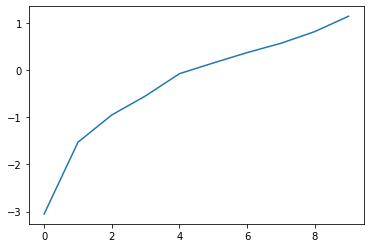

In [5]:
# Find percentile of X


q = np.linspace(start=0,stop=0.9,num=10) #0-0.9分10等分
percentileX = mquantiles(X,prob=q)       #分位數
print(percentileX)

plt.plot(percentileX)                    #EX:90/100的個數時的值
plt.show()                               #在python裡可不打

<Figure size 432x288 with 0 Axes>

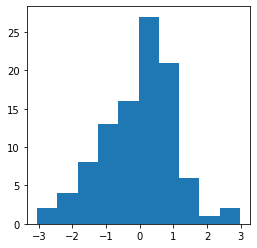

In [6]:
# Plot the histogram of X


plt.figure(1)               #是新建一個名叫Figure1的畫圖窗口 也可不打
plt.figure(figsize=(4,4))   #留著方便加其他東西
plt.hist(X)
plt.show()

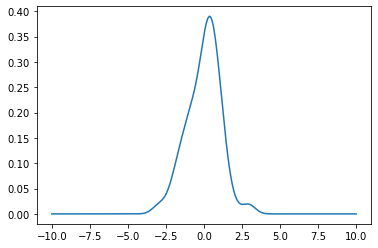

In [7]:
# Plot the density function of X  (PDF機率密度函數)


plt.figure(2)                     #新建一個名叫Figure2的畫圖窗口
density = gaussian_kde(X)         #以無母數方式估計隨機變量的概率密度函數（PDF）的方法
                                  #類似直方圖的概念
                                  #Kernel density estimation
xs = np.linspace(-10,10,200) 
plt.plot(xs,density(xs))          #PS:MLE 母數點估計(已知分配)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

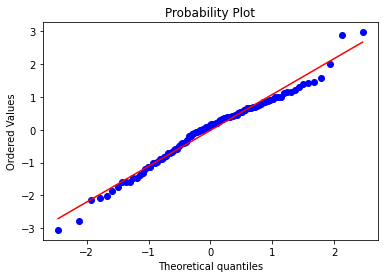

In [8]:
# QQ plot  Quantile-Quantile Plot(分位圖)：兩組數據各自排序比較分佈是否相同的方法


probplot(X,sparams=(0,1), dist="norm",fit = True , plot = plt)
#array 1 理論值 ；array 2 樣本分位數(排序) 
#sparams:特定於分佈的參數 (有母數 樣本)
#dist:沒打的話會預設 normal (理論值)
#如果 fit為 True（默認），則將最小二乘回歸（最佳擬合）線擬合到樣本數據
#如果呈現一直線，該數據就是常態分佈。

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

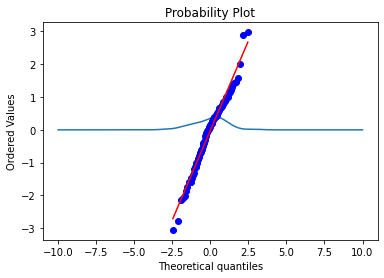

In [9]:
density = gaussian_kde(X)   
xs = np.linspace(-10,10,200)   
plt.plot(xs,density(xs))  

probplot(X,sparams=(0,1), dist="norm",plot=plt)

In [6]:
e = np.array([1,2,5,7,4,8,65,25,48,95,20,21,54,2,3,15])

print(np.var(e),'\n',np.var(e)*len(e)/(len(e)-1))

721.49609375 
 769.5958333333333
